In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import mlxtend

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
retail = pd.read_excel(r"C:\Users\ACS\OneDrive\Desktop\data sets\Online retail.xlsx", header = None)
retail = retail[0].str.split(',', expand=True)

In [5]:
retail

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7498,chicken,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7499,escalope,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [6]:
retail.duplicated().sum()

2325

In [7]:
retail.drop_duplicates(inplace = True)

In [8]:
retail

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,burgers,salmon,pancakes,french fries,frozen smoothie,fresh bread,mint,None,None,None,None,None,None,None,None,None,None,None,None,None
7494,turkey,burgers,dessert wine,shrimp,pasta,tomatoes,pepper,milk,pancakes,whole wheat rice,oil,frozen smoothie,None,None,None,None,None,None,None,None
7496,butter,light mayo,fresh bread,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [9]:
grocery_items = set()
for col in retail.columns:
    grocery_items.update(retail[col].unique())

output_list = list()
for _, row in retail.iterrows():
    row_val = {item: 0 for item in grocery_items}
    row_val.update({item: 1 for item in row if pd.notna(item)})
    output_list.append(row_val)

grocery = pd.DataFrame(output_list)

grocery.head()

,extra dark chocolate,mint,bramble,oatmeal,olive oil,asparagus,shallot,fromage blanc,milk,turkey,...,carrots,pet food,tomato juice,body spray,tomatoes,chocolate bread,corn,vegetables mix,bug spray,cottage cheese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Visualisation of given data**

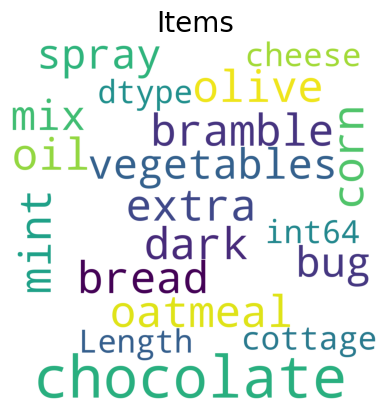

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(grocery.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

**Frequent itemsets**

In [11]:
freq_items = apriori(grocery, min_support =0.04, use_colnames = True)
freq_items

C:\Users\ACS\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.087713,(olive oil)
1,0.170015,(milk)
2,0.083269,(turkey)
3,0.192620,(french fries)
4,0.103555,(cake)
5,0.042504,(hot dogs)
6,0.054869,(champagne)
7,0.083849,(escalope)
8,0.129830,(frozen vegetables)
9,0.041151,(butter)


**Association rules**

In [12]:
asso_rules=association_rules(freq_items, metric = "lift", min_threshold = 1) # can use metric as lift

In [13]:
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(milk),(eggs),0.170015,0.208076,0.042311,0.248864,1.196024,0.006935,1.054302,0.197469
1,(eggs),(milk),0.208076,0.170015,0.042311,0.203343,1.196024,0.006935,1.041834,0.206960
2,(milk),(mineral water),0.170015,0.299845,0.067813,0.398864,1.330231,0.016835,1.164718,0.299103
3,(mineral water),(milk),0.299845,0.170015,0.067813,0.226160,1.330231,0.016835,1.072553,0.354566
4,(milk),(spaghetti),0.170015,0.229521,0.050039,0.294318,1.282316,0.011017,1.091822,0.265259
5,(spaghetti),(milk),0.229521,0.170015,0.050039,0.218013,1.282316,0.011017,1.061380,0.285745
6,(milk),(chocolate),0.170015,0.205178,0.044822,0.263636,1.284917,0.009939,1.079388,0.267161
7,(chocolate),(milk),0.205178,0.170015,0.044822,0.218456,1.284917,0.009939,1.061980,0.278980
8,(eggs),(french fries),0.208076,0.192620,0.046368,0.222841,1.156897,0.006288,1.038887,0.171252
9,(french fries),(eggs),0.192620,0.208076,0.046368,0.240722,1.156897,0.006288,1.042997,0.167974


In [14]:
asso_rules[asso_rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(milk),(eggs),0.170015,0.208076,0.042311,0.248864,1.196024,0.006935,1.054302,0.197469
1,(eggs),(milk),0.208076,0.170015,0.042311,0.203343,1.196024,0.006935,1.041834,0.206960
2,(milk),(mineral water),0.170015,0.299845,0.067813,0.398864,1.330231,0.016835,1.164718,0.299103
3,(mineral water),(milk),0.299845,0.170015,0.067813,0.226160,1.330231,0.016835,1.072553,0.354566
4,(milk),(spaghetti),0.170015,0.229521,0.050039,0.294318,1.282316,0.011017,1.091822,0.265259
5,(spaghetti),(milk),0.229521,0.170015,0.050039,0.218013,1.282316,0.011017,1.061380,0.285745
6,(milk),(chocolate),0.170015,0.205178,0.044822,0.263636,1.284917,0.009939,1.079388,0.267161
7,(chocolate),(milk),0.205178,0.170015,0.044822,0.218456,1.284917,0.009939,1.061980,0.278980
8,(eggs),(french fries),0.208076,0.192620,0.046368,0.222841,1.156897,0.006288,1.038887,0.171252
9,(french fries),(eggs),0.192620,0.208076,0.046368,0.240722,1.156897,0.006288,1.042997,0.167974


    1.What is lift and why is it important in Association rules?

Lift is a measure of the strength of the association between two items, taking into account the frequency of both items in the dataset. It is calculated as the confidence of the association divided by the support of the second item.

    2.What is support and Confidence. How do you calculate them?

Support
Support is calculated by dividing the number of transactions containing an item set by the total number of transactions.
Confidence
                           
                            
                             
Confidence is calculated by dividing the number of transactions containing both itemsets by the number of transactions containing the first itemset.

    3.What are some limitations or challenges of Association rules mining?

Some of the main drawbacks of association rule algorithms in e-learning are: the used algorithms have too many parameters for somebody non expert in data mining and the obtained rules are far too many, most of them non-interesting and with low comprehensibility.